## EDA with Python applying Logistic Regression

for the lecture will be working on Titanic data det from Kaggle. This is very famous dataset and very often is a student first step in machine 
learning!

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in python for 
classification.

We'll use a semi-cleaned version of the titanic data set, if you the data set hosting directly on kaggle. you may need to do some  additional cleaning not 
shown on leacture



## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("Titanic.csv")

In [3]:
# read frist five data set
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# read last five data set
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## data preprocessing

In [5]:
# read the column 

dataset_column =df.columns
print(f"Dataset_ column names,\n {dataset_column}")

Dataset_ column names,
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
# find out the number of rows and columns
df.shape

(891, 12)

In [7]:
# find  the columns information 
print(f"data information,\n {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
data information,
 None


In [8]:
# find each column data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# find the data details
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# find the duplicated
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [12]:
# find the total duplicated
total_duplicated = df.duplicated().sum()

In [13]:
total_duplicated

np.int64(0)

In [14]:
# find the missing data
miss_data = df.isnull()

In [15]:
miss_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# find the total null data in dataset
total_missdata= df.isnull().sum()

In [17]:
total_missdata

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

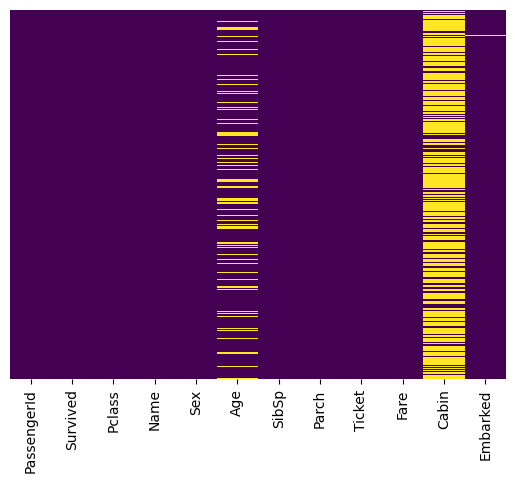

In [18]:
# find the missing data using visualizzation

sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap = "viridis")

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

C:\Users\ravik\AppData\Local\Temp\ipykernel_13252\3396684750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Survived", data = df, palette = "Set2")


<Axes: xlabel='Survived', ylabel='count'>

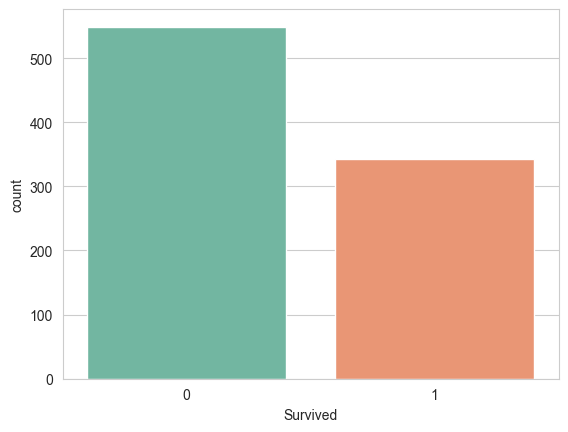

In [19]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", data = df, palette = "Set2")

<Axes: xlabel='Survived', ylabel='count'>

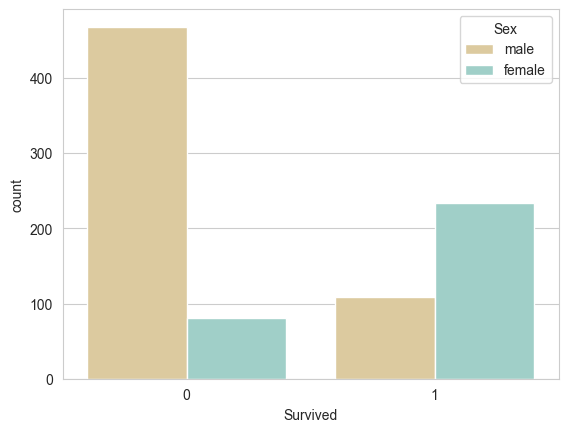

In [20]:
sns.set_style("whitegrid")
sns.countplot(x ="Survived", hue = "Sex", data =df, palette ="BrBG" )

<Axes: xlabel='Survived', ylabel='count'>

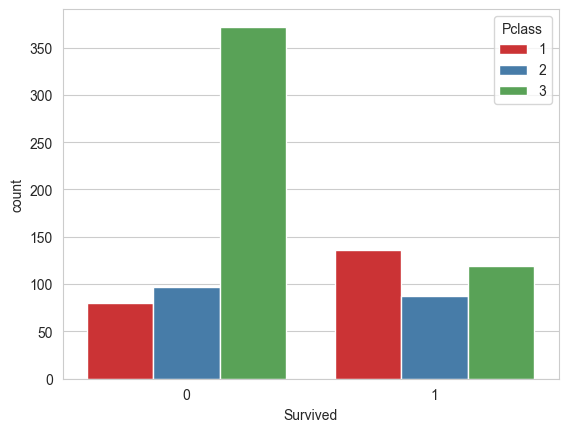

In [21]:
sns.set_style("whitegrid")
sns.countplot(x= "Survived",hue = "Pclass", data = df, palette = "Set1")

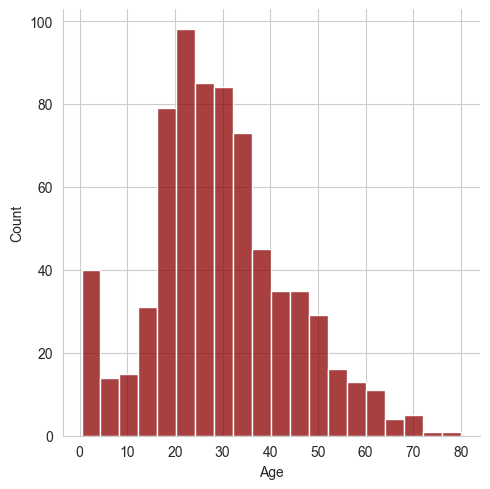

In [22]:
sns.displot(df["Age"].dropna(), kde = False, color = "darkred", bins = 20)

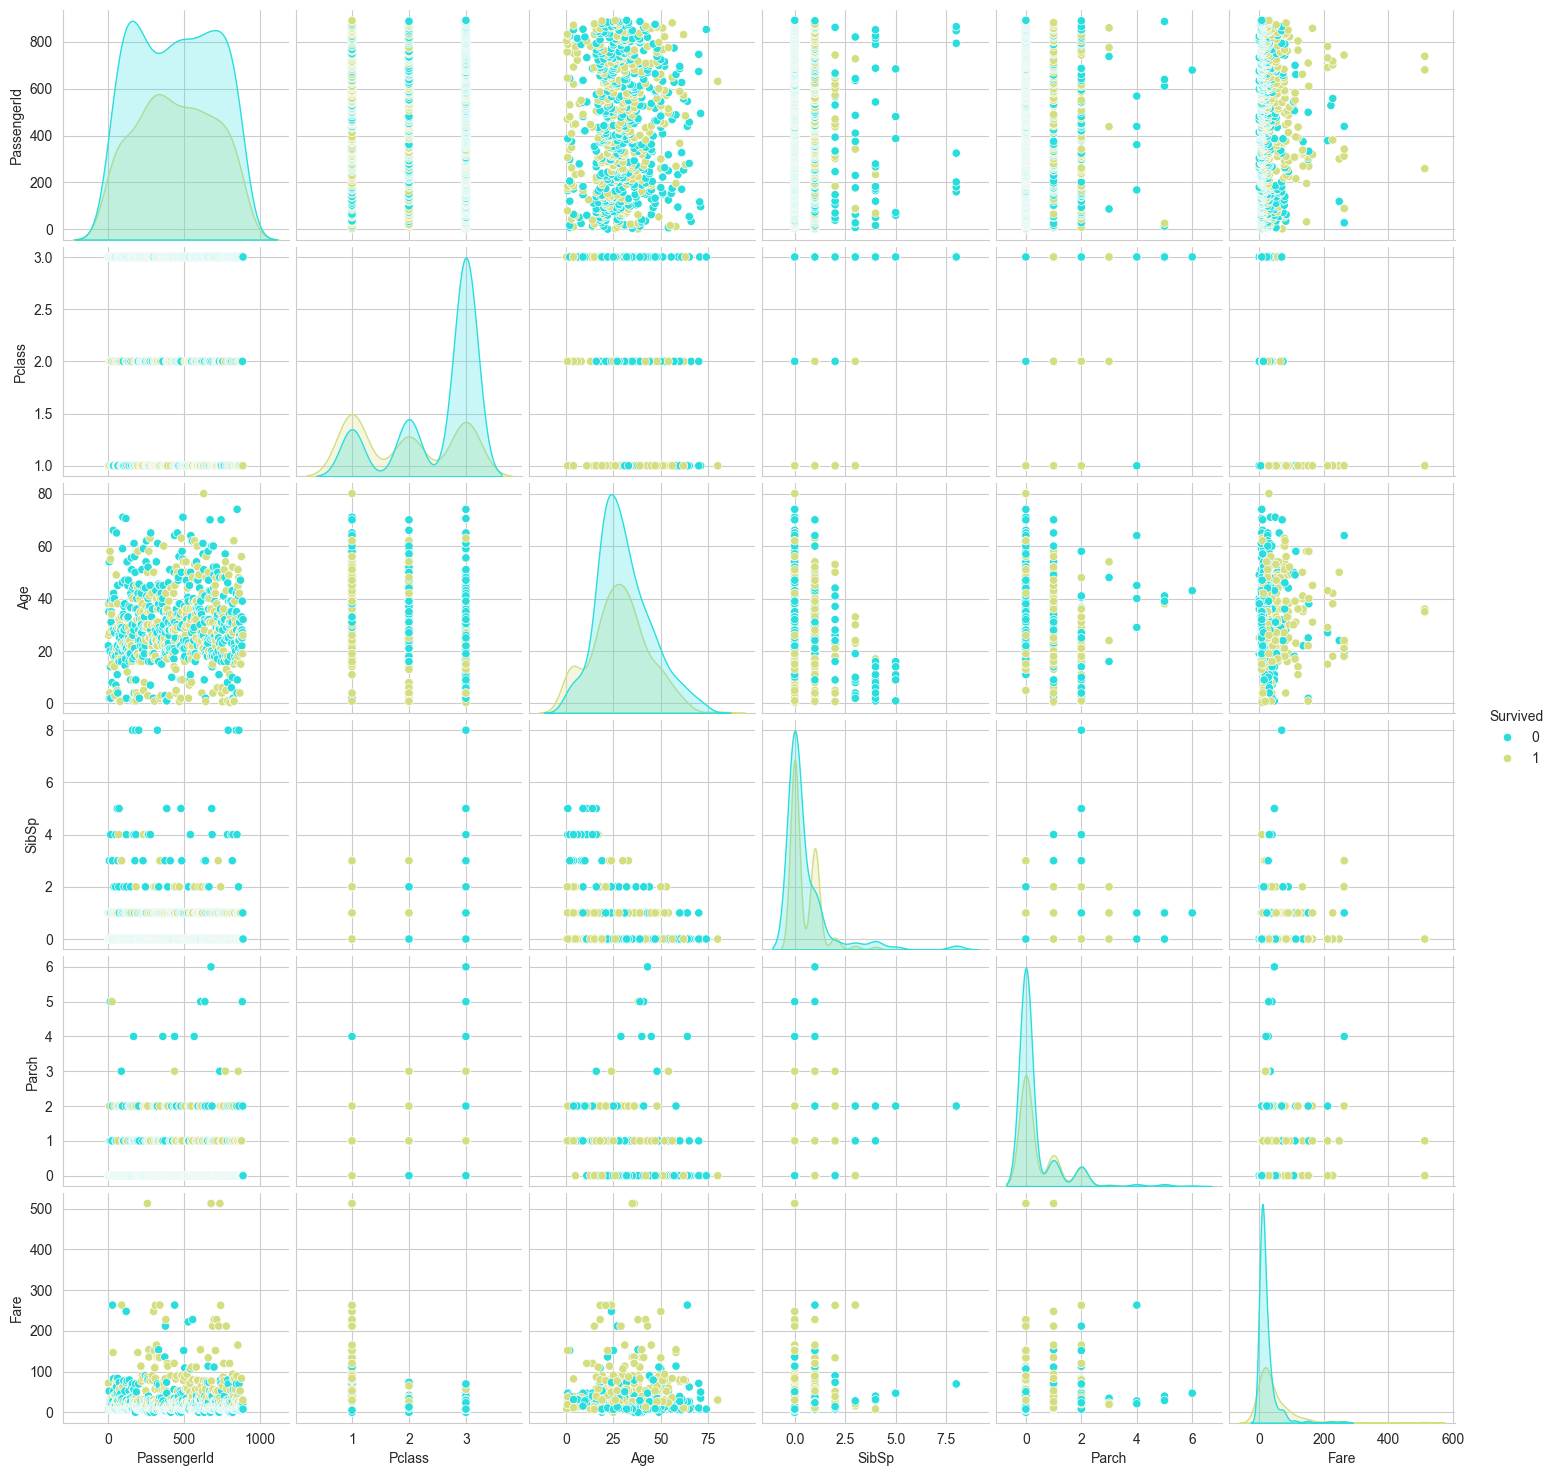

In [23]:
sns.set_style("whitegrid")
sns.pairplot(data=df, hue="Survived", palette="rainbow")
plt.show()

<Axes: >

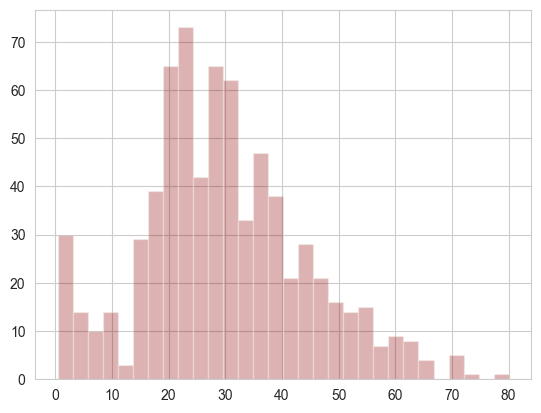

In [24]:
import matplotlib.pyplot as plt

df["Age"].hist(bins = 30, color = "darkred", alpha = 0.3)

C:\Users\ravik\AppData\Local\Temp\ipykernel_13252\3979910065.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "SibSp", data =df, palette = "pastel")


<Axes: xlabel='SibSp', ylabel='count'>

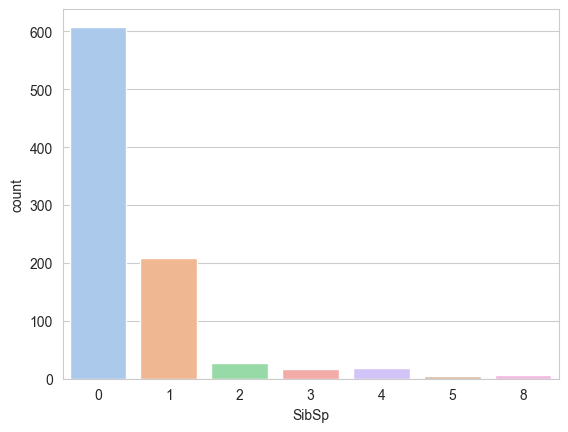

In [25]:
sns.countplot(x = "SibSp", data =df, palette = "pastel")

<Axes: >

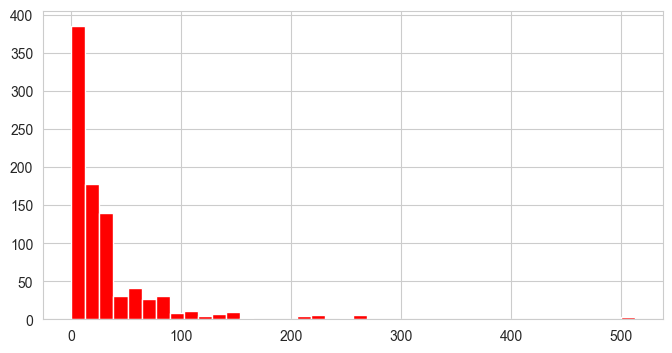

In [26]:
df["Fare"].hist(color = "red", bins =40, figsize = (8,4))

## Data cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). 
However we can be smarter about this and check the average age by passenger class. For example

C:\Users\ravik\AppData\Local\Temp\ipykernel_13252\3623035264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')


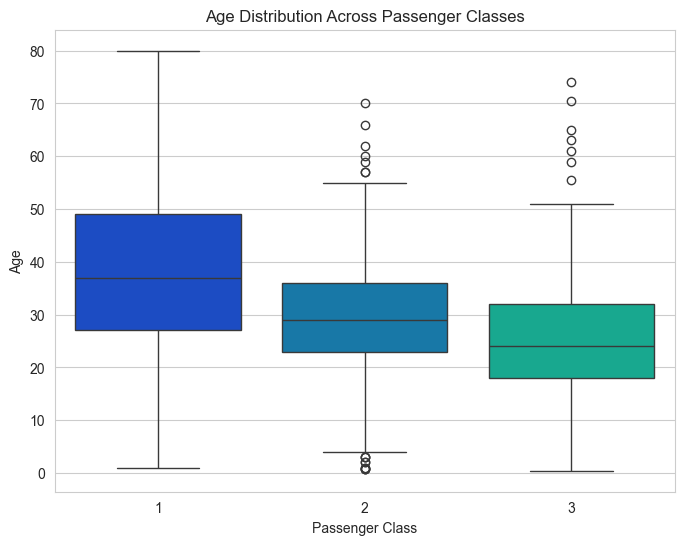

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')
plt.title('Age Distribution Across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


In [28]:
from sklearn.impute import SimpleImputer

imputer_object = SimpleImputer(strategy = "mean")
df["Age"] = imputer_object.fit_transform(df[["Age"]])
df["Age"].head(30)

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    29.699118
18    31.000000
19    29.699118
20    35.000000
21    34.000000
22    15.000000
23    28.000000
24     8.000000
25    38.000000
26    29.699118
27    19.000000
28    29.699118
29    29.699118
Name: Age, dtype: float64

<Axes: >

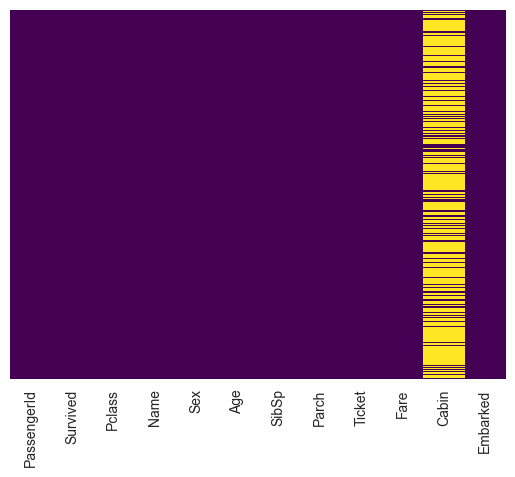

In [29]:
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap = "viridis")

In [30]:
df.drop("Cabin", axis = 1, inplace = True)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [36]:
# find the categorical data
data_columns = df.columns
categorical_data = []
for col in data_columns:
    if df[col].dtype == "O":
        categorical_data.append(col)
print(f"Categorical columns are \n, {categorical_data}")        


Categorical columns are 
, ['Name', 'Sex', 'Ticket', 'Embarked']


In [37]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [39]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [40]:
df.drop(["Name", "Ticket","Embarked"], axis =1, inplace =True)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [42]:
from sklearn.preprocessing import LabelEncoder

label_object = LabelEncoder()
df["Sex"] = label_object.fit_transform(df["Sex"])
df["Sex"].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [43]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


 ## Building a Logistic Regression model
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

In [44]:
x = df.drop("Survived", axis =1)
y = df["Survived"]

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\ravik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
prediction  = model.predict(x_test)

In [49]:
prediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0])

In [50]:
from sklearn.metrics import confusion_matrix
accuarcy = confusion_matrix(y_test, prediction)
accuarcy

array([[89, 16],
       [24, 50]])

In [52]:
from sklearn.metrics import accuracy_score  

score = accuracy_score(y_test, prediction) 
print(score)


0.776536312849162


## Evaluation
We can check precision,recall,f1-score using classification report!

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.68      0.71        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



. Accuracy = true positive +true negative / total
. Precision = True Positive/ (tp+fp)
. recall = tp /(tp +fn)
. f1_score = 2 x (precision x recall)/ (precision + recall)
